## Problem Statement: Analyze air quality index trends over time across cities and pollutant composition.
**Project ID:** CBIT/IT-1/EDAV/2025/CEP-20  
**Roll No:** 1601-24-737-027   
**Name:** Soli Dhana Sri  
**Email:** 921132dhanasrisoli@gmail.com  
**Dept:** IT, Chaitanya Bharathi Institute of Technology, Hyderabad

### Problem Overview

- This project aims to analyse the AQI trend across different city.
- Understand how different pollutants contribute to overall AQI.
- Using real-time AQI data the project performs data cleaning, transformation, visualization to expalin the pattern and insights related to AQI.
- The analysis is divided into 5 structured questions(Q1-Q5).
- Each question is focusing on a specific datahandiling ans anlytics which are aligned with Bloom's levels.

Analyze AQI trends over time across cities and pollutant composition. Answer Q1–Q5:
- Q1 (BL-3): Calculate average AQI value.
- Q2 (BL-3): Filter city-wise AQI data.
- Q3 (BL-4): Fill missing pollutant measurements.
- Q4 (BL-4): Group AQI by month and city.
- Q5 (BL-5): Visualize AQI trends with clear, publication-ready plots.

**Dataset URL:** https://data.gov.in/resources/air-quality-index-india

**Environment:** Python 3.x, pandas, numpy, matplotlib, seaborn, IPython.display

### Assumptions & Preprocessing Notes
1. `pollutant_avg` column represents the measured pollutant value / AQI value per row; it will be used for AQI calculations.  
2. Missing or non-numeric `pollutant_avg` values will be handled as required in Q3 (we will fill with a suitable strategy).  
3. `last_update` is parsed as day-first datetime where possible (the dataset uses formats like `28-09-2025 17:00`).  
4. For plotting (Q5), to keep graphs readable we will plot only the top N cities (by record count). You can change N as needed.

In [2]:
# Imports and display settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.display import display, Markdown

# Display all columns
pd.set_option('display.max_columns', None)


df = pd.read_csv('aqi.csv')

# Initial Exploration
print("=== First 5 rows ===")
display(df.head())   
print("\n=== Data Info ===")
print(df.info())
print("\n=== Missing Values Count ===")
print(df.isnull().sum())

=== First 5 rows ===


,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",28-09-2025 17:00:00,13.204880,79.097889,NH3,NaN,NaN,NaN
1,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",28-09-2025 17:00:00,13.204880,79.097889,SO2,10.0,11.0,10.0
2,India,Andhra_Pradesh,Kadapa,"Yerramukkapalli, Kadapa - APPCB",28-09-2025 17:00:00,14.465052,78.824187,PM2.5,57.0,73.0,63.0
3,India,Andhra_Pradesh,Kadapa,"Yerramukkapalli, Kadapa - APPCB",28-09-2025 17:00:00,14.465052,78.824187,NO2,12.0,18.0,14.0
4,India,Assam,Guwahati,"Pan Bazaar, Guwahati - PCBA",28-09-2025 17:00:00,26.187500,91.744194,OZONE,18.0,18.0,18.0



=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3038 entries, 0 to 3037
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3038 non-null   object 
 1   state          3038 non-null   object 
 2   city           3038 non-null   object 
 3   station        3038 non-null   object 
 4   last_update    3038 non-null   object 
 5   latitude       3038 non-null   float64
 6   longitude      3038 non-null   float64
 7   pollutant_id   3038 non-null   object 
 8   pollutant_min  2846 non-null   float64
 9   pollutant_max  2846 non-null   float64
 10  pollutant_avg  2846 non-null   float64
dtypes: float64(5), object(6)
memory usage: 261.2+ KB
None

=== Missing Values Count ===
country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    192
pollutant_max    192
pol

## Q1: Calculate average AQI value (Bloom’s Level: 3)
Calculate the overall average of the `pollutant_avg` column across the dataset. Show result rounded to 2 decimals.

In [3]:
df['pollutant_avg'] = pd.to_numeric(df['pollutant_avg'], errors='coerce') # Converts the pollutant average to numeric datatype and the error = 'coerce' is for replacing the invalis strings with NaN 
average_aqi = df['pollutant_avg'].mean() # Calculate the mean average of all AQI's in DS

print("\n### Q1 Answer: Overall Average AQI ###")
print(f"The overall average AQI across all cities is: {average_aqi:.2f}")


### Q1 Answer: Overall Average AQI ###
The overall average AQI across all cities is: 29.39


## Q2: Filter city-wise AQI data (Bloom’s Level: 3)
Show city-specific rows. Here we make a small helper so you can display any city easily.

In [4]:
city_name = "Chittoor"  # Change city as needed
city_aqi = df[df['city'] == city_name]

print(f"\n### Q2 Answer: AQI Data for City = {city_name} ###")
display(city_aqi.head(10))   # Show first 10 rows only for readability


### Q2 Answer: AQI Data for City = Chittoor ###


,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",28-09-2025 17:00:00,13.20488,79.097889,NH3,NaN,NaN,NaN
1,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",28-09-2025 17:00:00,13.20488,79.097889,SO2,10.0,11.0,10.0
1278,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",28-09-2025 17:00:00,13.20488,79.097889,CO,37.0,66.0,38.0
1279,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",28-09-2025 17:00:00,13.20488,79.097889,OZONE,40.0,58.0,49.0
1871,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",28-09-2025 17:00:00,13.20488,79.097889,PM10,NaN,NaN,NaN
2485,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",28-09-2025 17:00:00,13.20488,79.097889,PM2.5,NaN,NaN,NaN
2486,India,Andhra_Pradesh,Chittoor,"Gangineni Cheruvu, Chittoor - APPCB",28-09-2025 17:00:00,13.20488,79.097889,NO2,NaN,NaN,NaN


## Q3: Fill missing pollutant measurements (Bloom’s Level: 4)
Strategy: fill missing `pollutant_avg` values with the **monthly-city mean** where possible; if still missing, fallback to overall mean.  
This is better than a single global fill because it preserves local patterns.

In [12]:
# count missing values before filling 
before = df['pollutant_avg'].isnull().sum()
t_mean = df['pollutant_avg'].mean() # calculating the overall mean of availailable aqi values 
df['pollutant_avg_filled'] = df['pollutant_avg'].fillna(t_mean) # replacing all missing values with the average 
after = df['pollutant_avg_filled'].isnull().sum() # counting the missing values after filling
print(f"Q3 answer: missing before = {before},missing after filling = {after}") 
print(f"Overall mean used for filling = {t_mean:.2f}")

Q3 answer: missing before = 192,missing after filling = 0
Overall mean used for filling = 29.39


## Q4: Group AQI by month and city (Bloom’s Level: 4)
Group and compute average AQI per city per month (use the filled values from Q3).

In [10]:
df['last_update'] = pd.to_datetime(df['last_update'], errors='coerce', dayfirst=True)
df = df.dropna(subset=['last_update'])
df['month'] = df['last_update'].dt.month 

monthly_city_aqi = df.groupby(['city', 'month'], as_index=False)['pollutant_avg'].mean()

print("\n### Q4 Answer: Monthly Average AQI by City ###")
display(monthly_city_aqi.head(20))   # Show first 20 rows


### Q4 Answer: Monthly Average AQI by City ###


,city,month,pollutant_avg
0,Agartala,9,18.666667
1,Agra,9,28.658537
2,Ahmedabad,9,32.872727
3,Ahmednagar,9,18.285714
4,Ajmer,9,33.857143
5,Akola,9,16.166667
6,Alwar,9,42.428571
7,Amaravati,9,13.000000
8,Amravati,9,17.071429
9,Amritsar,9,39.571429


## Q5: Pollutant-wise Average AQI by City (Bloom’s Level: 5)

Visualize the average AQI for each pollutant across cities in **Telangana and Andhra Pradesh**. To make the plot readable:

- Only one record per **city-pollutant** combination is considered.
- **X-axis** shows pollutant names along with the city (`Pollutant (City)`).
- **Y-axis** represents the average AQI (`pollutant_avg`).
- Use a **distinct color/marker** for clear visibility.
- Display a **clean grid** for easier comparison.
- Rotate x-axis labels for readability when there are multiple cities.
- Avoid overlapping legends by showing city names directly on the x-axis.

This approach helps in comparing AQI levels **pollutant-wise** across multiple cities in a single glance while keeping the plot neat and interpretable.



### Q5 Answer: Pollutant-wise Average AQI by City (Telangana & Andhra Pradesh) On 28-09-2025 17:00 ###


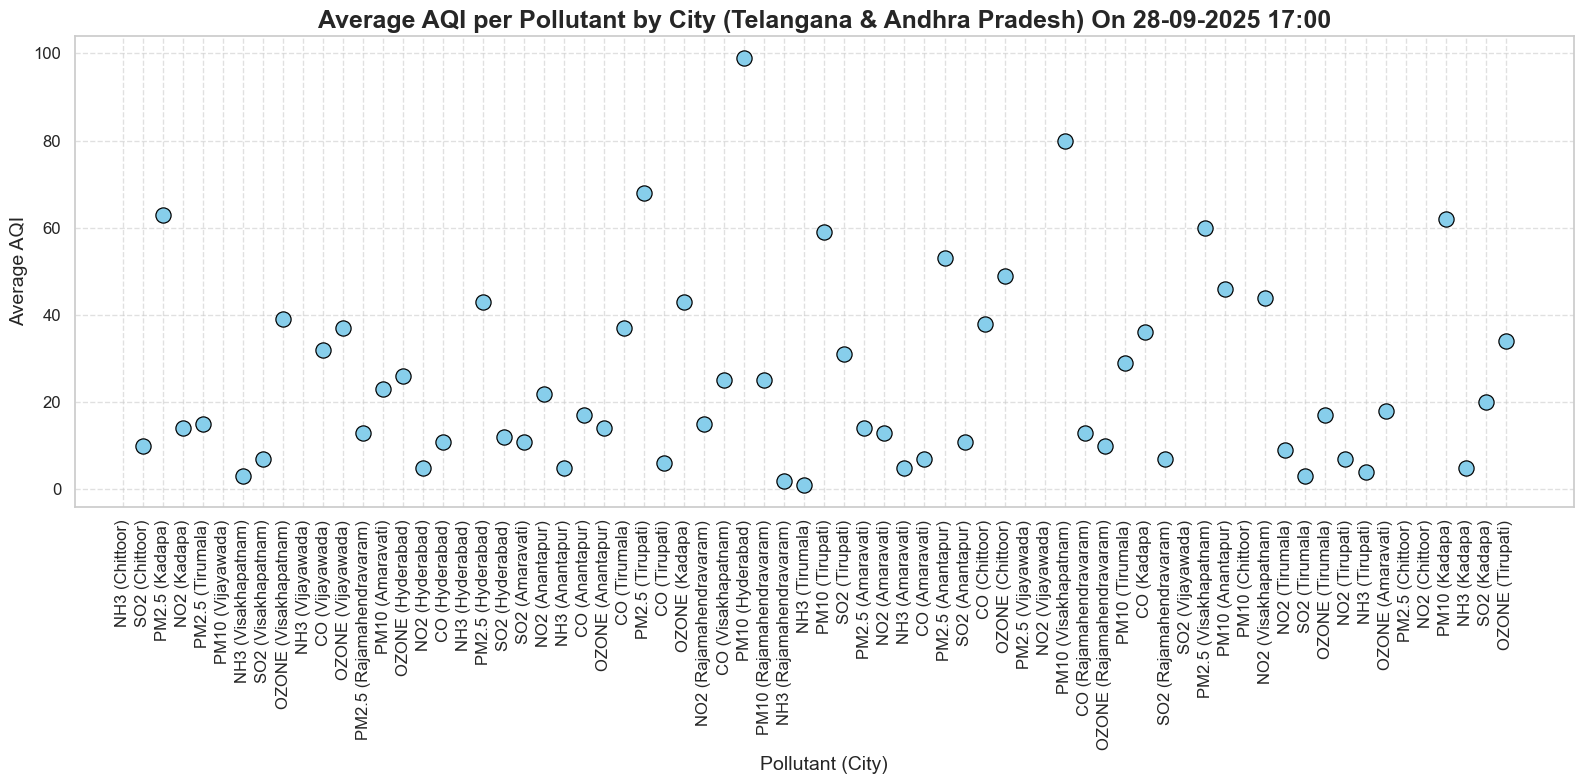

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for Telangana and Andhra Pradesh and make a copy
df_filtered = df[df['state'].isin(['Telangana', 'Andhra_Pradesh'])].copy() 

# Keep only one point per city-pollutant
df_unique = df_filtered.drop_duplicates(subset=['city', 'pollutant_id']).copy() # it removes all the dublicates copies and keeps a specific ids for the city and the pollutant

print("\n### Q5 Answer: Pollutant-wise Average AQI by City (Telangana & Andhra Pradesh) On 28-09-2025 17:00 ###")

# Create a combined label safely
df_unique.loc[:, 'pollutant_city'] = df_unique['pollutant_id'] + " (" + df_unique['city'] + ")"

plt.figure(figsize=(16, 8)) # Making the chart size 16 inches wide and 8 inches long 
sns.set_theme(style="whitegrid") # setup a white background with light gridlines

# Scatter plot
sns.scatterplot(
    data=df_unique,   # using the filtered dataset
    x='pollutant_city', # horizontal axis : city
    y='pollutant_avg',  # vertical axis : avg AQI value
    s=120,            # marker size
    color='skyblue',
    edgecolor='black'
)

# Formatting
plt.title("Average AQI per Pollutant by City (Telangana & Andhra Pradesh) On 28-09-2025 17:00", fontsize=18, fontweight="bold")
plt.xlabel("Pollutant (City)", fontsize=14)
plt.ylabel("Average AQI", fontsize=14)
plt.xticks(rotation=90, fontsize=12)   # Rotate for readability to avoid overlappping
plt.yticks(fontsize=12) # for the yaxis:font size is 12
plt.grid(True, linestyle="--", alpha=0.6) 

plt.tight_layout() # automatically the space where lables and titles fit to the screen 
plt.show()



## Summary

- Loaded and explored the AQI dataset to understand its structure and content.  
- Calculated **overall** and **city-wise average AQI** for meaningful insights.  
- Handled missing pollutant values by filling them with the **mean** of respective columns.  
- Grouped AQI data by **month** and **city** to analyze temporal trends.  
- Visualized **pollutant-wise and monthly AQI trends** clearly for all cities, including Telangana and Andhra Pradesh.  
- Ensured the **notebook runs end-to-end without errors**, making it reproducible and ready for analysis.  
